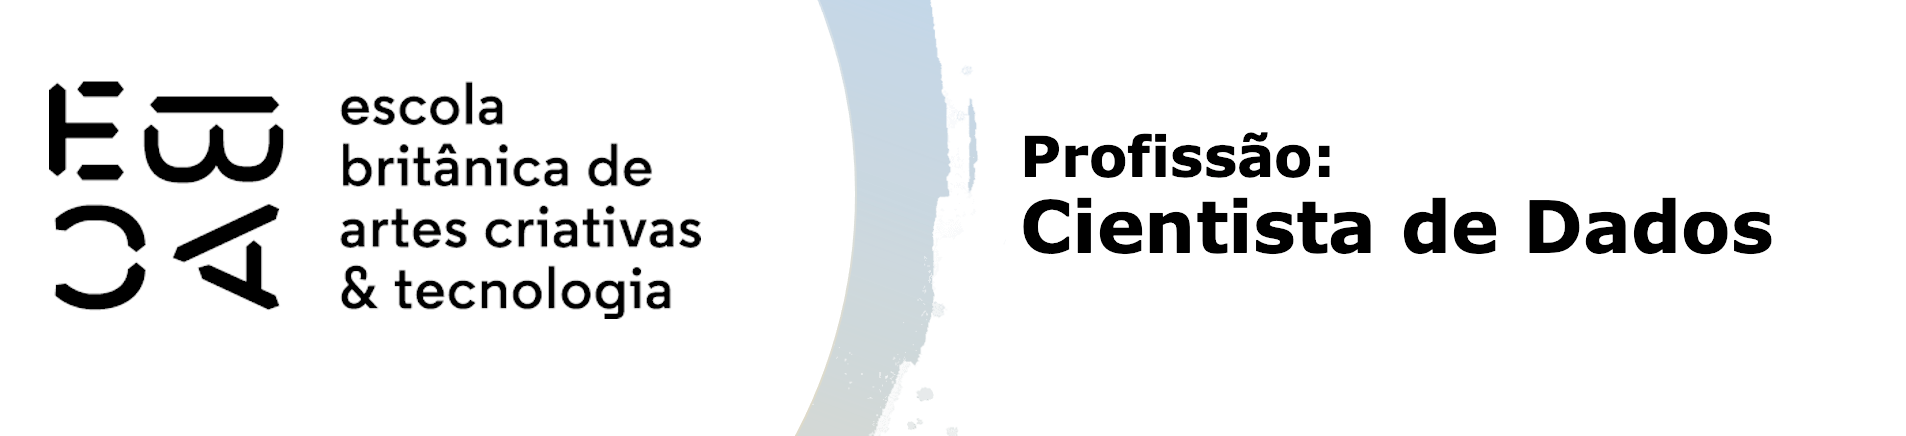

# Métodos hierárquicos de agrupamento - Tarefa

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

In [2]:
peng = sns.load_dataset('penguins')
peng.index.name='id'
peng_num = peng.select_dtypes(include='number').dropna()
peng_num.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
id,,,,
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


In [3]:
scaler = StandardScaler()
peng_scaled = scaler.fit_transform(peng_num)
peng_scaled = pd.DataFrame(peng_scaled, columns=peng_num.columns, index=peng_num.index)

cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
grupos = cluster.fit_predict(peng_scaled)

peng_num['grupo'] = grupos

peng_num.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,grupo
id,,,,,
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,0


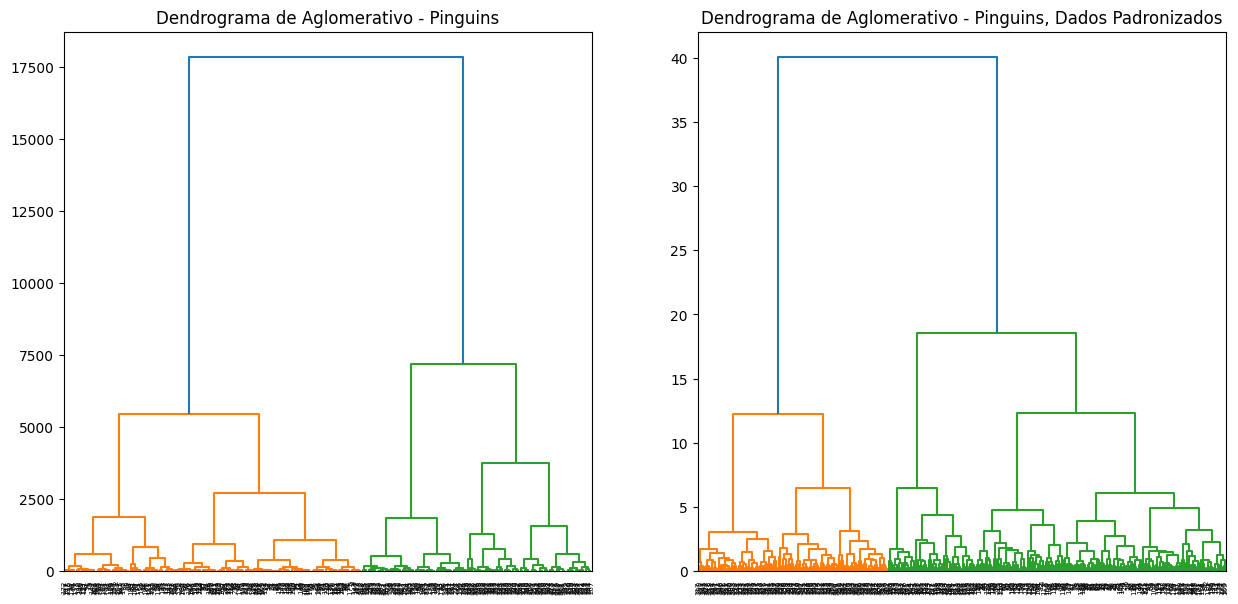

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

dend = shc.dendrogram(shc.linkage(peng_num, method='ward'), ax=ax[0])
ax[0].set_title('Dendrograma de Aglomerativo - Pinguins')
dend_scaled = shc.dendrogram(shc.linkage(peng_scaled, method='ward'), ax=ax[1])
ax[1].set_title('Dendrograma de Aglomerativo - Pinguins, Dados Padronizados')
plt.show()

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.


--- Tabela Cruzada de Espécies por Grupo ---


species,Adelie,Chinstrap,Gentoo
grupo,,,
0,151,11,0
1,0,0,123
2,0,57,0



--- Descrição das Variáveis Quantitativas por Grupo ---


grupo,0,1,2
bill_length_mm,39.150000,47.504878,49.752632
bill_depth_mm,18.287654,14.982114,18.601754
flipper_length_mm,189.901235,217.186992,197.105263
body_mass_g,3675.771605,5076.016260,3810.087719
grupo,0.000000,1.000000,2.000000



--- Visualização dos Grupos (Pairplot) ---


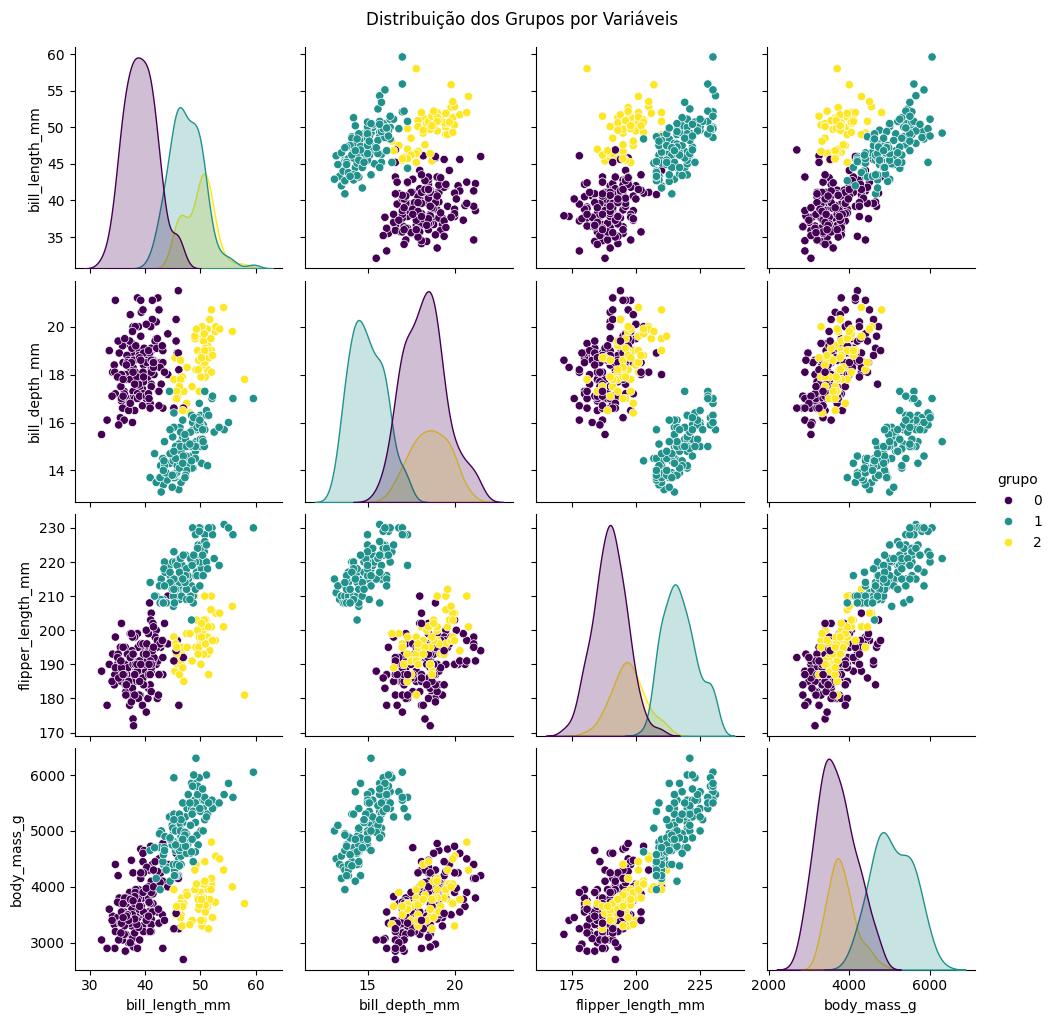

In [5]:
peng_num['species'] = peng['species']

print("\n--- Tabela Cruzada de Espécies por Grupo ---")

crosstab_species = pd.crosstab(peng_num['grupo'], peng_num['species'])
display(crosstab_species)

print("\n--- Descrição das Variáveis Quantitativas por Grupo ---")

numeric_cols = peng_num.select_dtypes(include='number').columns
desc_quantitativa = peng_num.groupby('grupo')[numeric_cols].mean().T
display(desc_quantitativa)

print("\n--- Visualização dos Grupos (Pairplot) ---")
sns.pairplot(peng_num, hue='grupo', palette='viridis')
plt.suptitle("Distribuição dos Grupos por Variáveis", y=1.02)
plt.show()

## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

In [6]:
cluster_5 = AgglomerativeClustering(n_clusters=5, linkage='ward')
grupos_5 = cluster_5.fit_predict(peng_scaled)

peng_analise_5 = peng_num.copy()
peng_analise_5['grupo_5'] = grupos_5

peng_analise_5['sex'] = peng['sex']

print("--- Contagem de Espécies por Grupo (k=5) ---")
crosstab_species_5 = pd.crosstab(peng_analise_5['grupo_5'], peng_analise_5['species'])
display(crosstab_species_5)

print("\n--- Contagem de Espécie e Sexo por Grupo (k=5) ---")
crosstab_sex_5 = pd.crosstab([peng_analise_5['grupo_5'], peng_analise_5['sex']], peng_analise_5['species'])
display(crosstab_sex_5)

--- Contagem de Espécies por Grupo (k=5) ---


species,Adelie,Chinstrap,Gentoo
grupo_5,,,
0,0,0,71
1,97,8,0
2,0,57,0
3,54,3,0
4,0,0,52



--- Contagem de Espécie e Sexo por Grupo (k=5) ---


species         Adelie  Chinstrap  Gentoo
grupo_5 sex                              
0       Female       0          0       9
        Male         0          0      61
1       Female      72          8       0
        Male        21          0       0
2       Female       0         23       0
        Male         0         34       0
3       Female       1          3       0
        Male        52          0       0
4       Female       0          0      49

### Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?
Sim, com certeza! O agrupamento com 5 clusters foi ainda mais inteligente que o anterior. Além de separar perfeitamente as três espécies, ele foi capaz de identificar um segundo padrão natural muito forte nos dados: o dimorfismo sexual dentro das espécies Adelie e Gentoo.

Em muitas espécies de pinguins, os machos são, em média, ligeiramente maiores e mais pesados que as fêmeas. O algoritmo de agrupamento, sem saber nada sobre pinguins, sexo ou espécies, conseguiu capturar essa sutil diferença nas medidas corporais e usá-la para separar os pinguins machos e fêmeas de forma quase perfeita dentro de cada espécie.

Isso demonstra o poder dos métodos de agrupamento para descobrir padrões latentes e significativos em um conjunto de dados.